In [1]:
%pylab inline
import warnings
import numpy as np
import matplotlib.pyplot as plt

import rayopt as ro

# ignore matplotlib and numpy warning each other
warnings.simplefilter("ignore", FutureWarning)
# ignore floating point exceptions
np.seterr(divide="ignore", invalid="ignore")
# by default only print 4 significant digits
np.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
description = "Nikkor-Z-58mmf0.95-WO2019229849A1"
columns = "type distance roc diameter material"

# Three different takes on dimensions

text1 = """
O 0         0        100.0    AIR
S 5.0      108.488     66.0    1.902650/35.77
S 7.65    -848.550     63.9    1.552981/55.07
S 2.8       50.252     56.9    AIR
S 18.12    -60.720     56.9    1.612660/44.46
S 2.8     2497.5       63.9    1.59319/67.9
S 9.15     -77.239     63.9    AIR       
S 0.40     113.763     69.4    1.8485/43.79
S 10.95   -178.06      69.4    AIR
S 0.4       70.659     63.2    1.59319/67.9
S 9.74   -1968.5       63.2    AIR         
S 0.2      289.687     59.7    1.59319/67.9
S 8.0      -97.087     57.6    1.738/32.33  
S 2.8       47.074     48.6    AIR
A 8.7        0         45.8    AIR
S 5.29     -95.230     47.2    1.612660/44.46
S 2.2       41.204     47.2    1.497820/82.57
S 11.55   -273.092     47.2    AIR         
S 0.2       76.173     50.0    1.883/40.69
S 9.5     -101.575     50.0    AIR          
S 0.20     176.128     45.8    1.953750/32.33
S 7.45     -67.221     44.4    1.738/32.33  
S 1.8       55.51      38.2    AIR
S 2.68      71.413     38.2    1.883/40.69
S 6.35    -115.025     38.2    1.69895/30.13
S 1.81      46.943     38.2    AIR
S 0.8       55.281     38.2    1.883/40.69
S 9.11    -144.041     38.2    1.765538/46.76
S 3.0       52.858     37.5    AIR   
S 14.5      0          43.4    1.5168/64.14
S 1.6       0          43.4    AIR
I 1.0       0          43.4    AIR
"""

text2 = """
O 0         0        100.0    AIR
S 5.0      108.488     65.6    1.902650/35.77
S 7.65    -848.550     64.6    1.552981/55.07
S 2.8       50.252     56.9    AIR
S 18.12    -60.720     57.6    1.612660/44.46
S 2.8     2497.5       64.2    1.59319/67.9
S 9.15     -77.239     64.2    AIR       
S 0.40     113.763     69.4    1.8485/43.79
S 10.95   -178.06      69.4    AIR
S 0.4       70.659     63.2    1.59319/67.9
S 9.74   -1968.5       63.2    AIR         
S 0.2      289.687     59.7    1.59319/67.9
S 8.0      -97.087     58.0    1.738/32.33  
S 2.8       47.074     49.0    AIR
A 8.7        0         46.5    AIR
S 5.29     -95.230     47.9    1.612660/44.46
S 2.2       41.204     48.6    1.497820/82.57
S 11.55   -273.092     48.6    AIR         
S 0.2       76.173     50.0    1.883/40.69
S 9.5     -101.575     50.0    AIR          
S 0.20     176.128     45.8    1.953750/32.33
S 7.45     -67.221     44.4    1.738/32.33  
S 1.8       55.51      38.5    AIR
S 2.68      71.413     38.5    1.883/40.69
S 6.35    -115.025     38.5    1.69895/30.13
S 1.81      46.943     38.5    AIR
S 0.8       55.281     38.2    1.883/40.69
S 9.11    -144.041     38.2    1.765538/46.76
S 3.0       52.858     37.5    AIR   
S 14.5      0          43.4    1.5168/64.14
S 1.6       0          43.4    AIR
I 1.0       0          43.4    AIR
"""

text3 = """
O 0         0        100.0    AIR
S 5.0      108.488     65.1    1.902650/35.77
S 7.65    -848.550     64.1    1.552981/55.07
S 2.8       50.252     56.5    AIR
S 18.12    -60.720     57.2    1.612660/44.46
S 2.8     2497.5       63.7    1.59319/67.9
S 9.15     -77.239     63.7    AIR       
S 0.40     113.763     68.9    1.8485/43.79
S 10.95   -178.06      68.9    AIR
S 0.4       70.659     62.7    1.59319/67.9
S 9.74   -1968.5       62.7    AIR         
S 0.2      289.687     59.2    1.59319/67.9
S 8.0      -97.087     57.5    1.738/32.33  
S 2.8       47.074     48.6    AIR
A 8.7        0         45.85    AIR
S 5.29     -95.230     47.5    1.612660/44.46
S 2.2       41.204     48.2    1.497820/82.57
S 11.55   -273.092     48.2    AIR         
S 0.2       76.173     49.6    1.883/40.69
S 9.5     -101.575     49.6    AIR          
S 0.20     176.128     45.5    1.953750/32.33
S 7.45     -67.221     44.1    1.738/32.33  
S 1.8       55.51      38.2    AIR
S 2.68      71.413     38.2    1.883/40.69
S 6.35    -115.025     38.2    1.69895/30.13
S 1.81      46.943     37.9    AIR
S 0.8       55.281     37.9    1.883/40.69
S 9.11    -144.041     37.9    1.765538/46.76
S 3.0       52.858     37.2    AIR   
S 14.5      0          43.1    1.5168/64.14
S 1.6       0          43.1    AIR
I 1.0       0          43.4    AIR
"""

text4 = """
O 0         0        100.0    AIR
S 5.0      108.488     66.5    1.902650/35.77
S 7.65    -848.550     65.3    1.552981/55.07
S 2.8       50.252     58.3    AIR
S 18.12    -60.720     58.5    1.612660/44.46
S 2.8     2497.5       65.3    1.59319/67.9
S 9.15     -77.239     65.3    AIR      
S 0.40     113.763     71.0    1.8485/43.79
S 10.95   -178.06      71.0    AIR
S 0.4       70.659     64.5    1.59319/67.9
S 9.74   -1968.5       64.5    AIR         
S 0.2      289.687     60.5    1.59319/67.9
S 8.0      -97.087     59.2    1.738/32.33  
S 2.8       47.074     49.8    AIR
A 8.7        0         47.7    AIR
S 5.29     -95.230     50.0    1.612660/44.46
S 2.2       41.204     50.0    1.497820/82.57
S 11.55   -273.092     48.1    AIR         
S 0.2       76.173     51.0    1.883/40.69
S 9.5     -101.575     49.4    AIR          
S 0.20     176.128     46.3    1.953750/32.33
S 7.45     -67.221     45.1    1.738/32.33  
S 1.8       55.51      39.1    AIR
S 2.68      71.413     39.1    1.883/40.69
S 6.35    -115.025     39.1    1.69895/30.13
S 1.81      46.943     39.1    AIR
S 0.8       55.281     38.5    1.883/40.69
S 9.11    -144.041     38.0    1.765538/46.76
S 3.0       52.858     38.0    AIR   
S 14.5      0          43.4    1.5168/64.14
S 1.6       0          43.4    AIR
I 1.0       0          43.4    AIR
"""

# A was 45.8 - changed to 44.6 to get F 0.9799
text5 = """
O 0         0        100.0    AIR
S 5.0      108.488     64.8    1.902650/35.77
S 7.65    -848.550     63.4    1.552981/55.07
S 2.8       50.252     56.0    AIR
S 18.12    -60.720     56.5    1.612660/44.46
S 2.8     2497.5       63.4    1.59319/67.9
S 9.15     -77.239     63.4    AIR       
S 0.40     113.763     68.3    1.8485/43.79
S 10.95   -178.06      68.3    AIR
S 0.4       70.659     62.5    1.59319/67.9
S 9.74   -1968.5       62.5    AIR         
S 0.2      289.687     58.7    1.59319/67.9
S 8.0      -97.087     57.2    1.738/32.33  
S 2.8       47.074     48.3    AIR
A 8.7        0         44.6    AIR
S 5.29     -95.230     48.1    1.612660/44.46
S 2.2       41.204     48.1    1.497820/82.57
S 11.55   -273.092     48.1    AIR         
S 0.2       76.173     49.4    1.883/40.69
S 9.5     -101.575     49.4    AIR          
S 0.20     176.128     45.3    1.953750/32.33
S 7.45     -67.221     44.1    1.738/32.33  
S 1.8       55.51      38.1    AIR
S 2.68      71.413     38.1    1.883/40.69
S 6.35    -115.025     38.1    1.69895/30.13
S 1.81      46.943     38.1    AIR
S 0.8       55.281     38.0    1.883/40.69
S 9.11    -144.041     37.6    1.765538/46.76
S 3.0       52.858     37.1    AIR   
S 14.5      0          42.9    1.5168/64.14
S 1.6       0          42.9    AIR
I 1.0       0          43.4    AIR
"""

# 2 has error
text=text5

In [3]:
# wavelengths=[588e-9],
s = ro.system_from_text(text, columns.split(),
    description=description)
s.object.angle = np.deg2rad(20.0)

## Aspheric data
s[1].conic      = 0.0
s[1].aspherics  = [0, -3.82177E-07, -6.06486E-11, -3.80172E-15, -1.32266E-18]
s[20].conic     = 0.0
s[20].aspherics = [0, -1.15028E-06, -4.51771E-10, 2.72670E-13, -7.66812E-17]
s[28].conic     = 0.0
s[28].aspherics = [0, 3.18645E-06, -1.14718E-08, 7.74567E-11, -2.24225E-13, 3.34790E-16, -1.70470E-19]

s.fields = 0, .7, 1.

In [4]:
s.update()
#s.paraxial.resize()
print(s)

System: Nikkor-Z-58mmf0.95-WO2019229849A1
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 20 deg
 Pupil:
   Pupil Distance: 74.2967
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 30.437
Image:
 Radius: 21.7
 Update Radius: True
 Pupil:
   Pupil Distance: -52.5815
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 26.8367
Stop: 14
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        100         basic/air   1.000   1.000   89.30
 1 S          5      108.5       64.8                 -   1.903   1.903   35.77
 2 S       7.65     -848.5       63.4                 -   1.553   1.553   55.07
 3 S        2.8      50.25         56         basic/air   1.000   1.000   89.30
 4 S      18.12     -60.72       56.5                 -   1.613   1.613   44.46
 5 S        2.8       2498       63.4                 -   1.593   1.593   67.90
 6 S       9.15     -77.24       63

c:\software\python37\lib\site-packages\rayopt\analysis.py:316: UserWarning: No contour levels were found within the data range.
  axo.contour(x, y, o, v, cmap=plt.cm.RdBu_r)


System: Nikkor-Z-58mmf0.95-WO2019229849A1
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 20 deg
 Pupil:
   Pupil Distance: 74.2967
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 30.437
Image:
 Radius: 21.7
 Update Radius: True
 Pupil:
   Pupil Distance: -52.5815
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 26.8367
Stop: 14
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        100         basic/air   1.000   1.000   89.30
 1 S          5      108.5       64.8                 -   1.903   1.903   35.77
 2 S       7.65     -848.5       63.4                 -   1.553   1.553   55.07
 3 S        2.8      50.25         56         basic/air   1.000   1.000   89.30
 4 S      18.12     -60.72       56.5                 -   1.613   1.613   44.46
 5 S        2.8       2498       63.4                 -   1.593   1.593   67.90
 6 S       9.15     -77.24       63

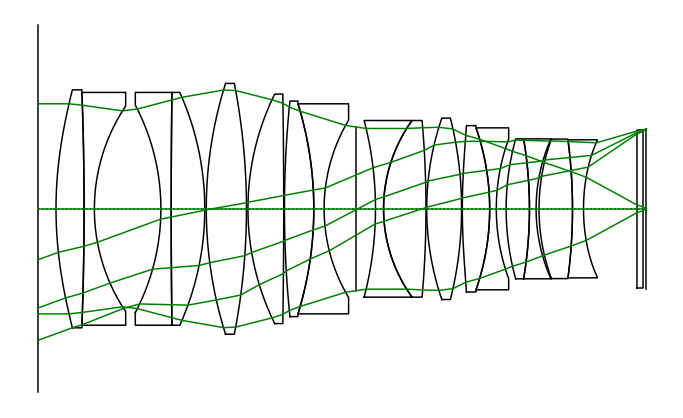

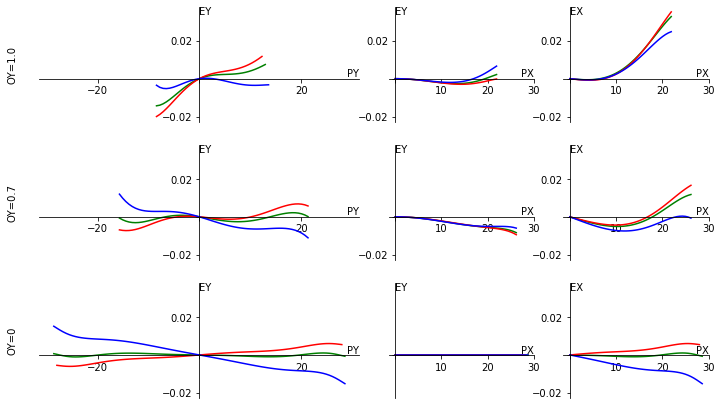

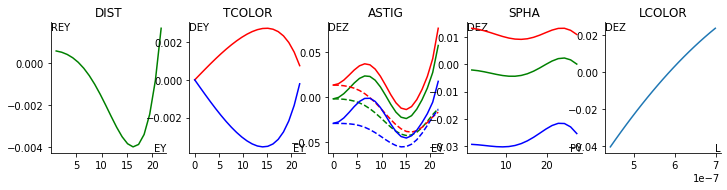

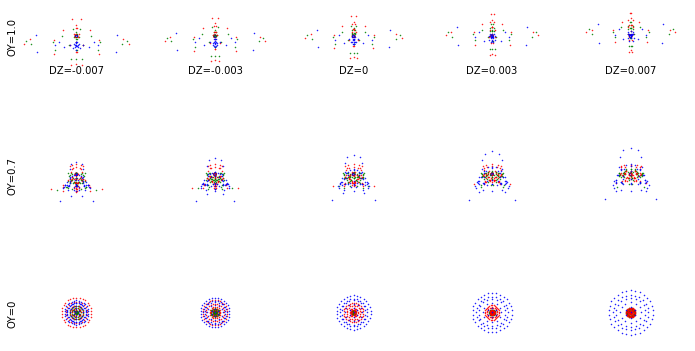

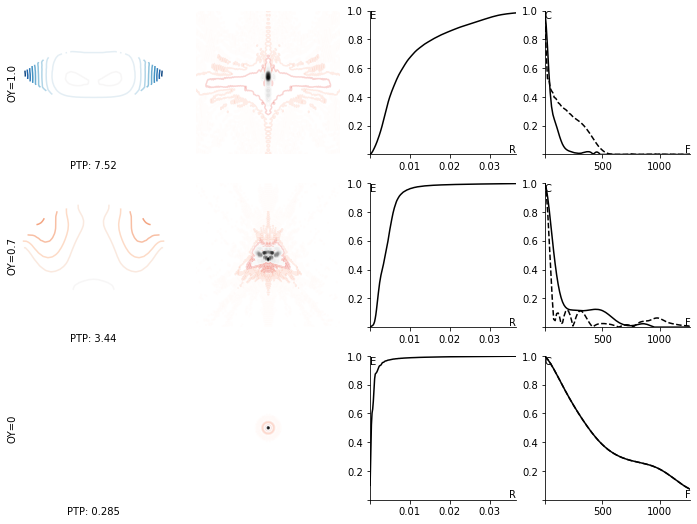

In [5]:
ro.Analysis(s)

System: WO2019-229849 Example 1 (Nikkor Z 58mm f/0.95 S)
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 20 deg
 Pupil:
   Pupil Distance: 89.2967
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 32.7014
Image:
 Radius: 21.7
 Update Radius: True
 Pupil:
   Pupil Distance: -52.5815
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 28.8332
Stop: 14
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf      86.84         basic/air   1.000   1.000   89.30
 1 S         20      108.5       66.8                 -   1.903   1.903   35.77
 2 S       7.65     -848.5      65.82                 -   1.553   1.553   55.07
 3 S        2.8      50.25      57.94         basic/air   1.000   1.000   89.30
 4 S      18.12     -60.72      58.28                 -   1.613   1.613   44.46
 5 S        2.8       2498      65.32                 -   1.593   1.593   67.90
 6 S       9.15    

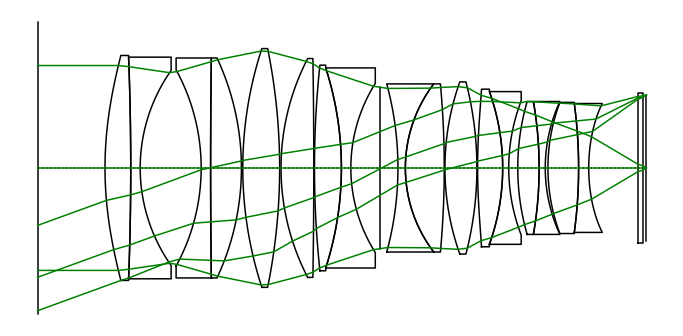

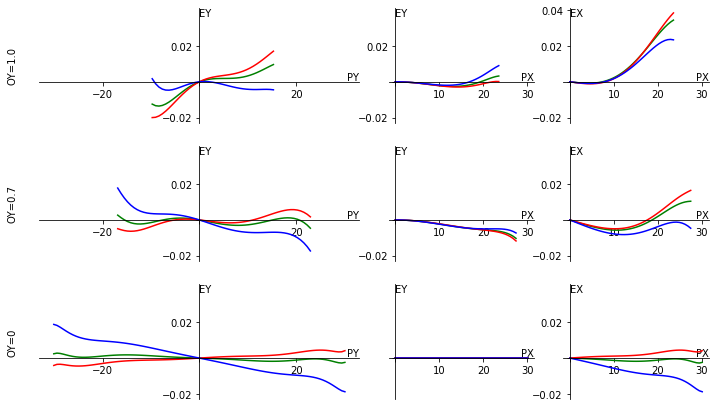

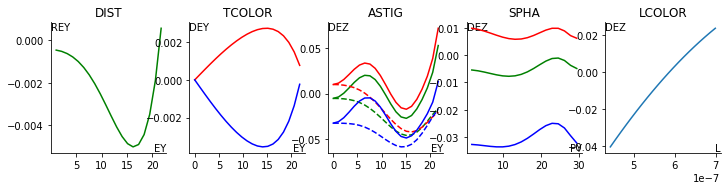

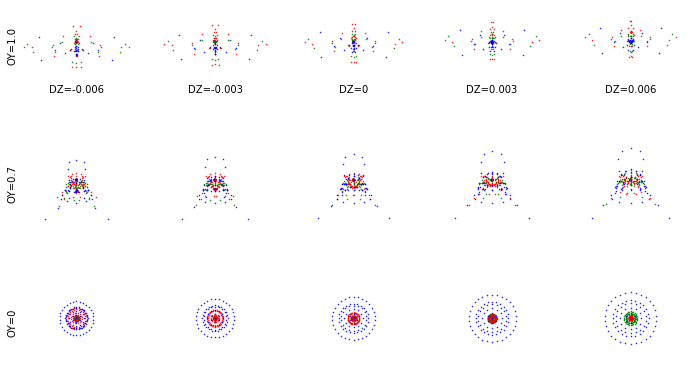

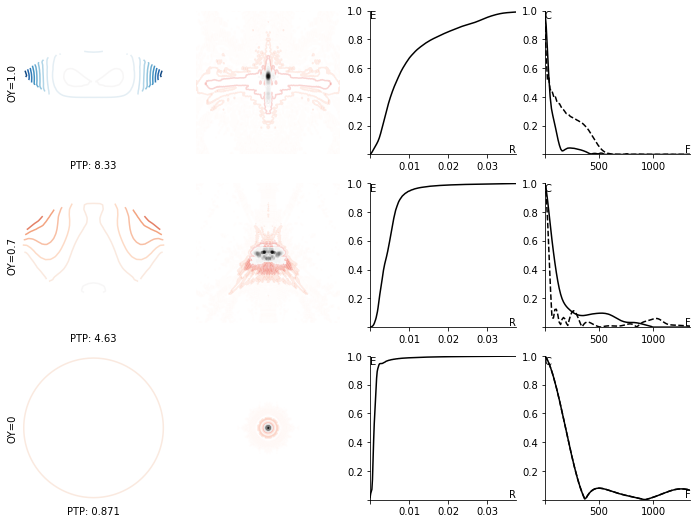

In [6]:
# From Bill Claff's data
description = "WO2019-229849 Example 1 (Nikkor Z 58mm f/0.95 S)"
columns = "type distance roc diameter material"
# number of surfaces = 30
lensdata = """
O 0.0 0.0 86.84 AIR
S 20 108.488 66.8 1.90265/35.77
S 7.65 -848.55 65.82 1.552981/55.07
S 2.8 50.252 57.94 AIR
S 18.12 -60.72 58.28 1.61266/44.46
S 2.8 2497.5 65.32 1.59319/67.9
S 9.15 -77.239 65.32 AIR
S 0.4 113.763 70.9 1.8485/43.79
S 10.95 -178.06 70.9 AIR
S 0.4 70.659 65 1.59319/67.9
S 9.74 -1968.5 65 AIR
S 0.2 289.687 61.06 1.59319/67.9
S 8 -97.087 59.42 1.738/32.33
S 2.8 47.074 50.24 AIR
A 8.7 0 47.918 AIR
S 5.29 -95.23 49.92 1.61266/44.46
S 2.2 41.204 49.92 1.49782/82.57
S 11.55 -273.092 49.92 AIR
S 0.2 76.173 51.12 1.883/40.69
S 9.5 -101.575 51.12 AIR
S 0.2 176.128 46.8 1.95375/32.33
S 7.45 -67.221 45.36 1.738/32.33
S 1.8 55.51 39.84 AIR
S 2.68 71.413 39.46 1.883/40.69
S 6.35 -115.025 39.46 1.69895/30.13
S 1.81 46.943 39.46 AIR
S 0.8 55.281 38.94 1.883/40.69
S 9.11 -144.041 38.28 1.765538/46.76
S 3 52.858 38.28 AIR
S 14.5 0 44.3 1.5168/64.14
S 1.6 0 44.3 AIR
I 1 0 43.4 AIR
"""
s = ro.system_from_text(lensdata, columns.split(),
    description=description)
s.fields = 0, .7, 1.
s.object.angle = np.deg2rad(19.980000)
s[1].conic = 0
s[1].aspherics = [0, -3.82177e-07, -6.06486e-11, -3.80172e-15, -1.32266e-18, 0, 0]
s[20].conic = 0
s[20].aspherics = [0, -1.15028e-06, -4.51771e-10, 2.7267e-13, -7.66812e-17, 0, 0]
s[28].conic = 0
s[28].aspherics = [0, 3.18645e-06, -1.14718e-08, 7.74567e-11, -2.24225e-13, 3.3479e-16, -1.7047e-19]
s.update()
print(s)
ro.Analysis(s)
